<img style="float:center" src="img/explore.jpg" width=300/>

# Exploring the data

When we look at spreadsheets or large amounts of data, its hard for us to understand what is really happening. But when we visually interpret the data then everything starts making sense.

<img style="float::left" src="img/explore-reason.png" />

## Step by step approach

** First let us look at our data **

In [30]:
import pandas as pd
from sqlalchemy import create_engine
import matplotlib.pyplot as plt
import seaborn as sns


In [31]:
%matplotlib inline

In [2]:
engine = create_engine('sqlite:////home/nischal/hard-disk-reduced.db')

In [3]:
data_sneak_peek_df = pd.read_sql_query(sql='''SELECT * FROM DATA limit 10''',con=engine)

In [4]:
data_sneak_peek_df.head()

,model,date,serial_number,capacity_bytes,failure,smart_1_raw,smart_5_raw,smart_9_raw,smart_194_raw,smart_197_raw
0,Hitachi HDS5C3030ALA630,2013-08-07,MJ0351YNG9Z0XA,3000592982016,0,0,0,6887,29,0
1,Hitachi HDS5C3030ALA630,2013-08-07,MJ0351YNG9Z7LA,3000592982016,0,0,0,6444,26,0
2,Hitachi HDS5C3030ALA630,2013-08-07,MJ0351YNGABYAA,3000592982016,0,0,0,5592,28,0
3,Hitachi HDS5C4040ALE630,2013-08-07,PL1321LAG34XWH,4000787030016,0,0,0,3555,30,0
4,Hitachi HDS5C4040ALE630,2013-08-07,PL1311LAG2205A,4000787030016,0,0,0,3557,28,0


In [19]:
#now we see that there are different models of hard disks, let us list them

<img style="float:center" src="img/distinct.gif" />

In [7]:
hard_disk_models_df = pd.read_sql_query(sql='''SELECT distinct(model) from data''',con=engine)

In [10]:
# let us take a look at some of the models
hard_disk_models_df.head()

,model
0,Hitachi HDS5C3030ALA630
1,Hitachi HDS5C4040ALE630
2,Hitachi HDS723030ALA640
3,Hitachi HDS722020ALA330
4,ST31500541AS


In [14]:
#let us see how many models are there in total
print "Total number of distinct models : "+ str(hard_disk_models_df.count()[0])

Total number of distinct models : 39


In [21]:
# Exerice 1: Find the distinct number of serial numbers

In [22]:
# Exercise 2: Find the distinct number of capacity bytes}

<img style="float:center" src="img/group-by.gif" />

In [28]:
# Now let us see how many hard disks are there for each model
# We see that serial number represents the hard disk and they are related to a model and plot it


In [33]:
total_hard_disk_per_model_df = pd.read_sql_query(sql='''SELECT model,count(distinct(serial_number)) as 
                                                        total_hard_disk
                                                        from data group by model ''',con=engine)

In [34]:
total_hard_disk_per_model_df.head()

,model,total_hard_disk
0,HGST HMS5C4040ALE640,45
1,Hitachi HDS5C3030ALA630,4606
2,Hitachi HDS5C3030BLE630,1
3,Hitachi HDS5C4040ALE630,2685
4,Hitachi HDS722020ALA330,4733


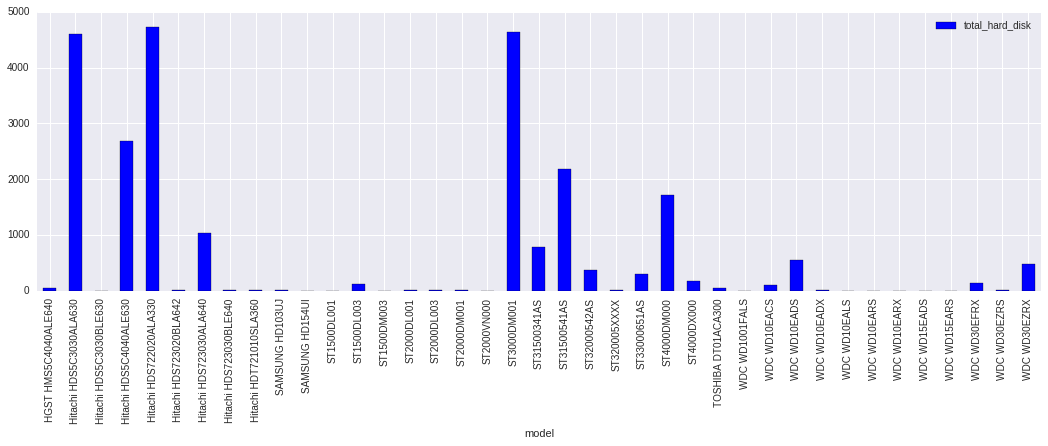

In [39]:
total_hard_disk_per_model_df.plot(kind="bar",x="model",y="total_hard_disk",figsize=(18,5))

In [25]:
#Exercise 3: Find the count of different capacity bytes for a model and plot it

In [26]:
# Now let us find the failures for a given hard disk model

In [40]:
hard_disk_failures_df = pd.read_sql_query(sql='''SELECT model,sum(failure) as total_failure 
                                                 from data group by model''',con=engine)

In [41]:
hard_disk_failures_df.head()

,model,total_failure
0,HGST HMS5C4040ALE640,1
1,Hitachi HDS5C3030ALA630,15
2,Hitachi HDS5C3030BLE630,0
3,Hitachi HDS5C4040ALE630,16
4,Hitachi HDS722020ALA330,16


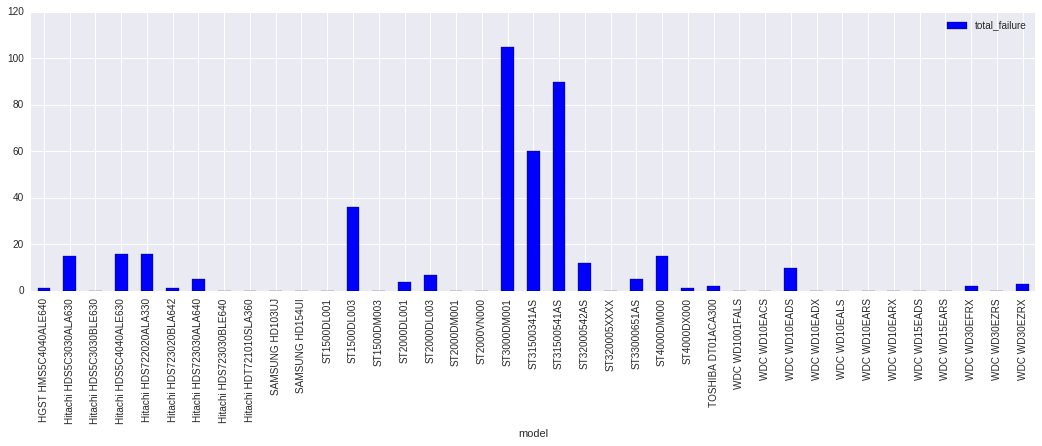

In [42]:
hard_disk_failures_df.plot(kind="bar",x="model",y="total_failure",figsize=(18,5))

##### The above charts give us an explanation of which models failed the most, which models had the most number of hard disks running.

<img style="float:center" src="img/explore-clock.png" width=150/>

##### Hard disk data is time series data, so let us start using time